# Import the Libraries 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [6]:
#import the  cnn layers

In [7]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# 2.Image Augmentation

In [8]:
#image preprocession or image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
#rescale=>rescaling pixel value from 0 to 255 to 255 to 0 to 1
# shear_range=> counter clockwise rotation (anti clock)

In [10]:
x_train = train_datagen.flow_from_directory(r"D:\Anaconda\data set\Training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3453 images belonging to 5 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
x_test = test_datagen.flow_from_directory(r"D:\Anaconda\data set\Testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 864 images belonging to 5 classes.


In [13]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# 3.Create Model

In [14]:
model = Sequential()

# 4. Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [15]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
#32 indicates =>no of feature detector
#(3,3)=>kernal size (feature detector size)

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu")) # hidden layer

In [19]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [20]:
#output layer
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 5)                 1005      
                                                        

# 5.Compile The Model

In [21]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# 6.Fit The Model

In [20]:
# train the model
model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)

C:\Users\Hari\AppData\Local\Temp\ipykernel_11796\1102939130.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
108/108 [==============================] - 49s 449ms/step - loss: 0.1567 - accuracy: 0.9461 - val_loss: 2.4369 - val_accuracy: 0.5926
Epoch 2/30
108/108 [==============================] - 51s 475ms/step - loss: 0.1613 - accuracy: 0.9412 - val_loss: 2.2384 - val_accuracy: 0.6065
Epoch 3/30
108/108 [==============================] - 50s 461ms/step - loss: 0.1220 - accuracy: 0.9597 - val_loss: 2.2116 - val_accuracy: 0.6273
Epoch 4/30
108/108 [==============================] - 64s 587ms/step - loss: 0.1217 - accuracy: 0.9615 - val_loss: 2.3019 - val_accuracy: 0.6227
Epoch 5/30
108/108 [==============================] - 51s 474ms/step - loss: 0.1161 - accuracy: 0.9589 - val_loss: 2.2689 - val_accuracy: 0.6354
Epoch 6/30
108/108 [==============================] - 50s 459ms/step - loss: 0.1336 - accuracy: 0.9592 - val_loss: 2.3241 - val_accuracy: 0.6169
Epoch 7/30
108/108 [==============================] - 51s 475ms/step - loss: 0.1143 - accuracy: 0.9624 - val_loss: 2.3847 - val_ac

# 7.Save the Model

In [22]:
model.save("Flowers.h5")

# 8.Test the model

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
#load the model
model=load_model("flowers.h5")

In [25]:
img=image.load_img(r"D:\Anaconda\data set\Testing\daisy\18195689904_46619b7e16_n.jpg")

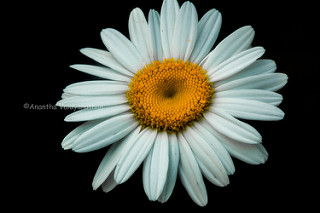

In [26]:
img

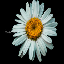

In [28]:
img=image.load_img(r"D:\Anaconda\data set\Testing\daisy\18195689904_46619b7e16_n.jpg", target_size=(64,64))
img

In [29]:
x=image.img_to_array(img)

In [30]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [33]:
y=np.argmax(model.predict(x),axis=0)

1/1 [==============================] - 4s 4s/step


In [34]:
y

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [36]:
index=['daisy','dandelion','rose','sunflower']

In [37]:
index[y[0]]

'daisy'

In [51]:
img=image.load_img(r"D:\Anaconda\data set\Testing\dandelin\17570530696_6a497298ee_n.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','dandelion','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 71ms/step


'dandelion'

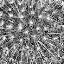

In [52]:
img

In [58]:
img=image.load_img(r"D:\Anaconda\data set\Testing\rose\13929462317_96342a9a44.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','rose','dandelion','sunflower']
index[y[0]]

1/1 [==============================] - 0s 71ms/step


'rose'

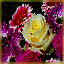

In [59]:
img

In [60]:
img=image.load_img(r"D:\Anaconda\data set\Testing\sunflower\12471441503_d188b5f31a_m.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=0)
index=['sunflower','daisy','dandelion','rose']
index[y[0]]

1/1 [==============================] - 0s 72ms/step


'sunflower'

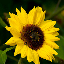

In [61]:
img